1110
1100
NoiseModel:
  Basis gates: ['cx', 'id', 'rz', 'sx']
  Instructions with noise: ['measure']
  All-qubits errors: ['measure']


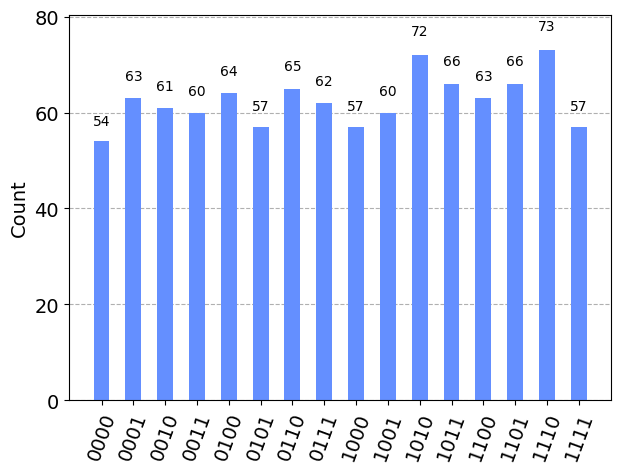

In [18]:
from qiskit import QuantumCircuit, execute
from qiskit_aer import Aer
from qiskit.tools.visualization import plot_histogram
from qiskit_aer.noise import (NoiseModel, QuantumError, pauli_error, depolarizing_error)

backend = Aer.get_backend('qasm_simulator')
qc = QuantumCircuit(4, 4)
# qc.measure_all()
qc.measure(list(range(4)),list(range(4))) 

p_meas = 0.5

error_meas = pauli_error([('X', p_meas), ('I', 1 - p_meas)])

noise_model = NoiseModel()
noise_model.add_all_qubit_quantum_error(error_meas, "measure")

result = execute(qc,backend,shots=1000, noise_model=noise_model).result() 
# result = execute(qc,backend,shots=1000).result() 

counts = result.get_counts(0)
max_key = max(counts, key=counts.get)

print(max_key)
bits = list(result.get_counts(0).keys())[0]

print(bits)
print(noise_model)
plot_histogram(counts)


In [3]:
print("ddd")

ddd


0000
dict_keys(['0011', '1010', '1110', '0101', '0100', '0001', '1100', '1001', '1000', '0110', '1101', '0010', '0000'])
0011
NoiseModel:
  Basis gates: ['cx', 'id', 'rz', 'sx']
  Instructions with noise: ['measure']
  All-qubits errors: ['measure']


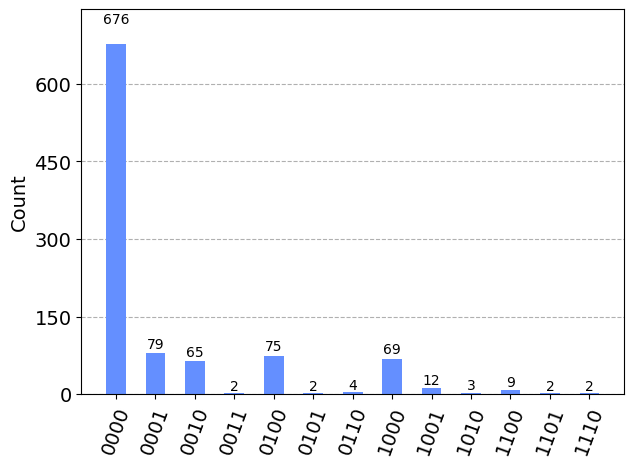

In [4]:
from qiskit import QuantumCircuit, execute
from qiskit_aer import Aer
from qiskit.tools.visualization import plot_histogram
from qiskit_aer.noise import (NoiseModel, QuantumError, pauli_error, depolarizing_error)

backend = Aer.get_backend('qasm_simulator')
qc = QuantumCircuit(4)
qc.measure_all()

p_meas = 0.1

error_meas = pauli_error([('X', p_meas), ('I', 1 - p_meas)])

noise_model = NoiseModel()
noise_model.add_all_qubit_quantum_error(error_meas, "measure")

result = execute(qc,backend,shots=1000, noise_model=noise_model).result() 
# result = execute(qc,backend,shots=1000).result() 

counts = result.get_counts(0)
bits = list(result.get_counts(0).keys())[0]

print(counts.most_frequent())
print(result.get_counts(0).keys())
print(bits)
print(noise_model)
plot_histogram(counts)